In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
highestgrosser = pd.read_csv('../HighestGrossers.csv')
ticketsales2 = pd.read_csv('../TicketSales_cleaned.csv')

In [3]:
highestgrosser
highestgrosser['TICKETS SOLD'] = highestgrosser['TICKETS SOLD'].replace(',','', regex=True)

In [21]:
ticketsales2.head()

,Unnamed: 0,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Total Box Office Numeric
0,0,2021,423774881,3881777912,3881777912,9.16,3881777912
1,1,2020,223638958,2048534616,2048534616,9.16,2048534616
2,2,2019,1228541629,11253443955,11253444050,9.16,11253443955
3,3,2018,1311536128,11948096650,12013670952,9.11,11948096650
4,4,2017,1225639761,10993991460,11226860216,8.97,10993991460


In [22]:
highestgrosser.sort_values('YEAR', ascending=False).head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
26,26,26,26,26,2021,Shang-Chi and the Legend of the Ten Rings,Action,PG-13,Walt Disney,"$224,226,704","$224,226,704",24478897
25,25,25,25,25,2020,Bad Boys For Life,Action,R,Sony Pictures,"$204,417,855","$204,417,848",22316359
24,24,24,24,24,2019,Avengers: Endgame,Action,PG-13,Walt Disney,"$858,373,000","$858,373,002",93708843
23,23,23,23,23,2018,Black Panther,Action,PG-13,Walt Disney,"$700,059,566","$703,901,821",76845177
22,22,22,22,22,2017,Star Wars Ep. VIII: The Last Jedi,Action,PG-13,Walt Disney,"$517,218,368","$528,173,936",57660910


In [6]:
# #Gather genre from imdb

highestgrosser.loc[24, 'GENRE'] = 'Action'
highestgrosser.loc[25, 'GENRE'] = 'Action'
highestgrosser.loc[26, 'GENRE'] = 'Action'

In [7]:
highestgrosser.to_csv('../HighestGrossers.csv')

In [8]:
#combine ticket sales and highest grossingtables
HighestGrossingplussales = highestgrosser.merge(ticketsales2, how='inner', on='YEAR')
HighestGrossingplussales.head()

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD_x,Unnamed: 0_y,TICKETS SOLD_y,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Total Box Office Numeric
0,0,0,0,0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978",42306002,26,1221705907,5314421390,11190826105,4.35,5314421390
1,1,1,1,1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608",69269062,25,1305221290,5769078886,11955781912,4.42,5769078886
2,2,2,2,2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943",54607854,24,1357349648,6230235770,12433322785,4.59,6230235770
3,3,3,3,3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808",94524324,23,1443832471,6771575283,13225505439,4.69,6771575283
4,4,4,4,4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749",84732942,22,1444664086,7338894852,13233123027,5.08,7338894852


In [9]:
HighestGrossingplussales = HighestGrossingplussales.drop("Unnamed: 0_y", axis=1)

In [10]:
HighestGrossingplussales.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'YEAR', 'MOVIE', 'GENRE', 'MPAA RATING', 'DISTRIBUTOR',
       'TOTAL FOR YEAR', 'TOTAL IN 2019 DOLLARS', 'TICKETS SOLD_x',
       'TICKETS SOLD_y', 'TOTAL BOX OFFICE',
       'TOTAL INFLATION ADJUSTED BOX OFFICE', 'AVERAGE TICKET PRICE',
       'Total Box Office Numeric'],
      dtype='object')

In [11]:
HighestGrossingplussales.rename(columns = {'TICKETS SOLD_x': 'Tickets movie sold', 'TICKETS SOLD_y': 'Total tickets sold this year'}, inplace=True)

In [40]:
HighestGrossingplussales = HighestGrossingplussales.drop("Unnamed: 0_x", axis=1)
HighestGrossingplussales = HighestGrossingplussales.drop("Unnamed: 0.1", axis=1)
HighestGrossingplussales = HighestGrossingplussales.drop("Unnamed: 0.1.1", axis=1)
HighestGrossingplussales = HighestGrossingplussales.drop("Unnamed: 0.1.1.1", axis=1)

KeyError: "['Unnamed: 0_x'] not found in axis"

In [41]:
HighestGrossingplussales = HighestGrossingplussales.drop("Unnamed: 0.1.1.1", axis=1)

In [43]:
HighestGrossingplussales = HighestGrossingplussales.drop("Total Box Office Numeric", axis=1)

In [44]:
HighestGrossingplussales.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,Tickets movie sold,Total tickets sold this year,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978",42306002,1221705907,5314421390,11190826105,4.35
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608",69269062,1305221290,5769078886,11955781912,4.42
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943",54607854,1357349648,6230235770,12433322785,4.59
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808",94524324,1443832471,6771575283,13225505439,4.69
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749",84732942,1444664086,7338894852,13233123027,5.08


In [14]:
ticketsales2['TICKETS SOLD'] = ticketsales2['TICKETS SOLD'].replace(',','', regex=True)

In [45]:
HighestGrossingplussales.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,Tickets movie sold,Total tickets sold this year,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978",42306002,1221705907,5314421390,11190826105,4.35
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608",69269062,1305221290,5769078886,11955781912,4.42
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943",54607854,1357349648,6230235770,12433322785,4.59
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808",94524324,1443832471,6771575283,13225505439,4.69
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749",84732942,1444664086,7338894852,13233123027,5.08


In [46]:
HighestGrossingplussales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 27 non-null     int64  
 1   MOVIE                                27 non-null     object 
 2   GENRE                                27 non-null     object 
 3   MPAA RATING                          27 non-null     object 
 4   DISTRIBUTOR                          27 non-null     object 
 5   TOTAL FOR YEAR                       27 non-null     object 
 6   TOTAL IN 2019 DOLLARS                27 non-null     object 
 7   Tickets movie sold                   27 non-null     int64  
 8   Total tickets sold this year         27 non-null     int64  
 9   TOTAL BOX OFFICE                     27 non-null     int64  
 10  TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     int64  
 11  AVERAGE TICKET PRICE              

In [47]:
HighestGrossingplussales['GENRE'].value_counts()

Adventure    14
Action       12
Drama         1
Name: GENRE, dtype: int64

TypeError: object of type 'int' has no len()

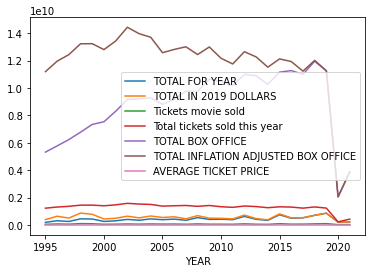

In [60]:
HighestGrossingplussales.plot(x='YEAR')
plt.yticks(1000000)
#How do I thicken the bars
#Can I adjust the length of the y column numbers



In [51]:
HighestGrossingplussales['TOTAL FOR YEAR'] = HighestGrossingplussales['TOTAL FOR YEAR'].replace('\$','', regex=True)
HighestGrossingplussales['TOTAL FOR YEAR'] = HighestGrossingplussales['TOTAL FOR YEAR'].replace(' ','', regex=True)
HighestGrossingplussales['TOTAL FOR YEAR'] = HighestGrossingplussales['TOTAL FOR YEAR'].replace(',','', regex=True)

In [52]:
HighestGrossingplussales['TOTAL FOR YEAR'] = HighestGrossingplussales['TOTAL FOR YEAR'].astype('int64')

In [53]:
HighestGrossingplussales['TOTAL IN 2019 DOLLARS'] = HighestGrossingplussales['TOTAL IN 2019 DOLLARS'].replace('\$','', regex=True)
HighestGrossingplussales['TOTAL IN 2019 DOLLARS'] = HighestGrossingplussales['TOTAL IN 2019 DOLLARS'].replace(' ','', regex=True)
HighestGrossingplussales['TOTAL IN 2019 DOLLARS'] = HighestGrossingplussales['TOTAL IN 2019 DOLLARS'].replace(',','', regex=True)

In [54]:
HighestGrossingplussales['TOTAL IN 2019 DOLLARS'] = HighestGrossingplussales['TOTAL IN 2019 DOLLARS'].astype('int64')

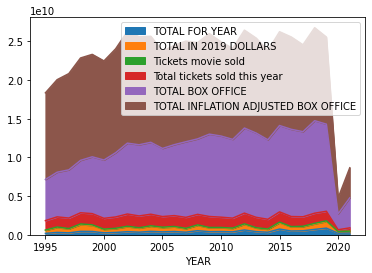

In [78]:
Areaplotnumbers = HighestGrossingplussales[['YEAR','TOTAL FOR YEAR', 'TOTAL IN 2019 DOLLARS', 'Tickets movie sold', 'Total tickets sold this year', 'TOTAL BOX OFFICE', 'TOTAL INFLATION ADJUSTED BOX OFFICE']]
Areaplotnumbers.plot.area(x='YEAR')
#How do I thicken the bars
#Can I adjust the length of the y column numbers


plt.show()

ValueError: need at least one array to concatenate

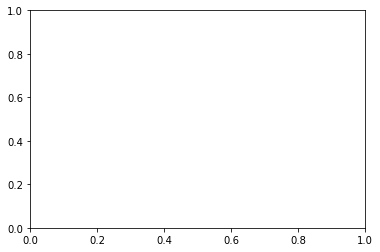

In [74]:
plt.stackplot(x='YEAR', data=HighestGrossingplussales)

In [18]:
HighestGrossingplussales['MPAA RATING'].value_counts()

PG-13    19
PG        5
G         2
R         1
Name: MPAA RATING, dtype: int64

In [19]:
HighestGrossingplussales['DISTRIBUTOR'].value_counts()

Walt Disney           12
Sony Pictures          4
Warner Bros.           4
20th Century Fox       3
Paramount Pictures     2
Universal              1
Dreamworks SKG         1
Name: DISTRIBUTOR, dtype: int64

In [24]:
# HighestGrossingplussales['TICKETS SOLD_x'] = HighestGrossingplussales['TICKETS SOLD_x'].replace(',','', regex=True)
# HighestGrossingplussales['TICKETS SOLD_x'] = HighestGrossingplussales['TICKETS SOLD_x'].astype('int64')

In [25]:
HighestGrossingplussales.head()

,Unnamed: 0.1.1.1,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,Tickets movie sold,Total tickets sold this year,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Total Box Office Numeric
0,0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978",42306002,1221705907,5314421390,11190826105,4.35,5314421390
1,1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608",69269062,1305221290,5769078886,11955781912,4.42,5769078886
2,2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943",54607854,1357349648,6230235770,12433322785,4.59,6230235770
3,3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808",94524324,1443832471,6771575283,13225505439,4.69,6771575283
4,4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749",84732942,1444664086,7338894852,13233123027,5.08,7338894852


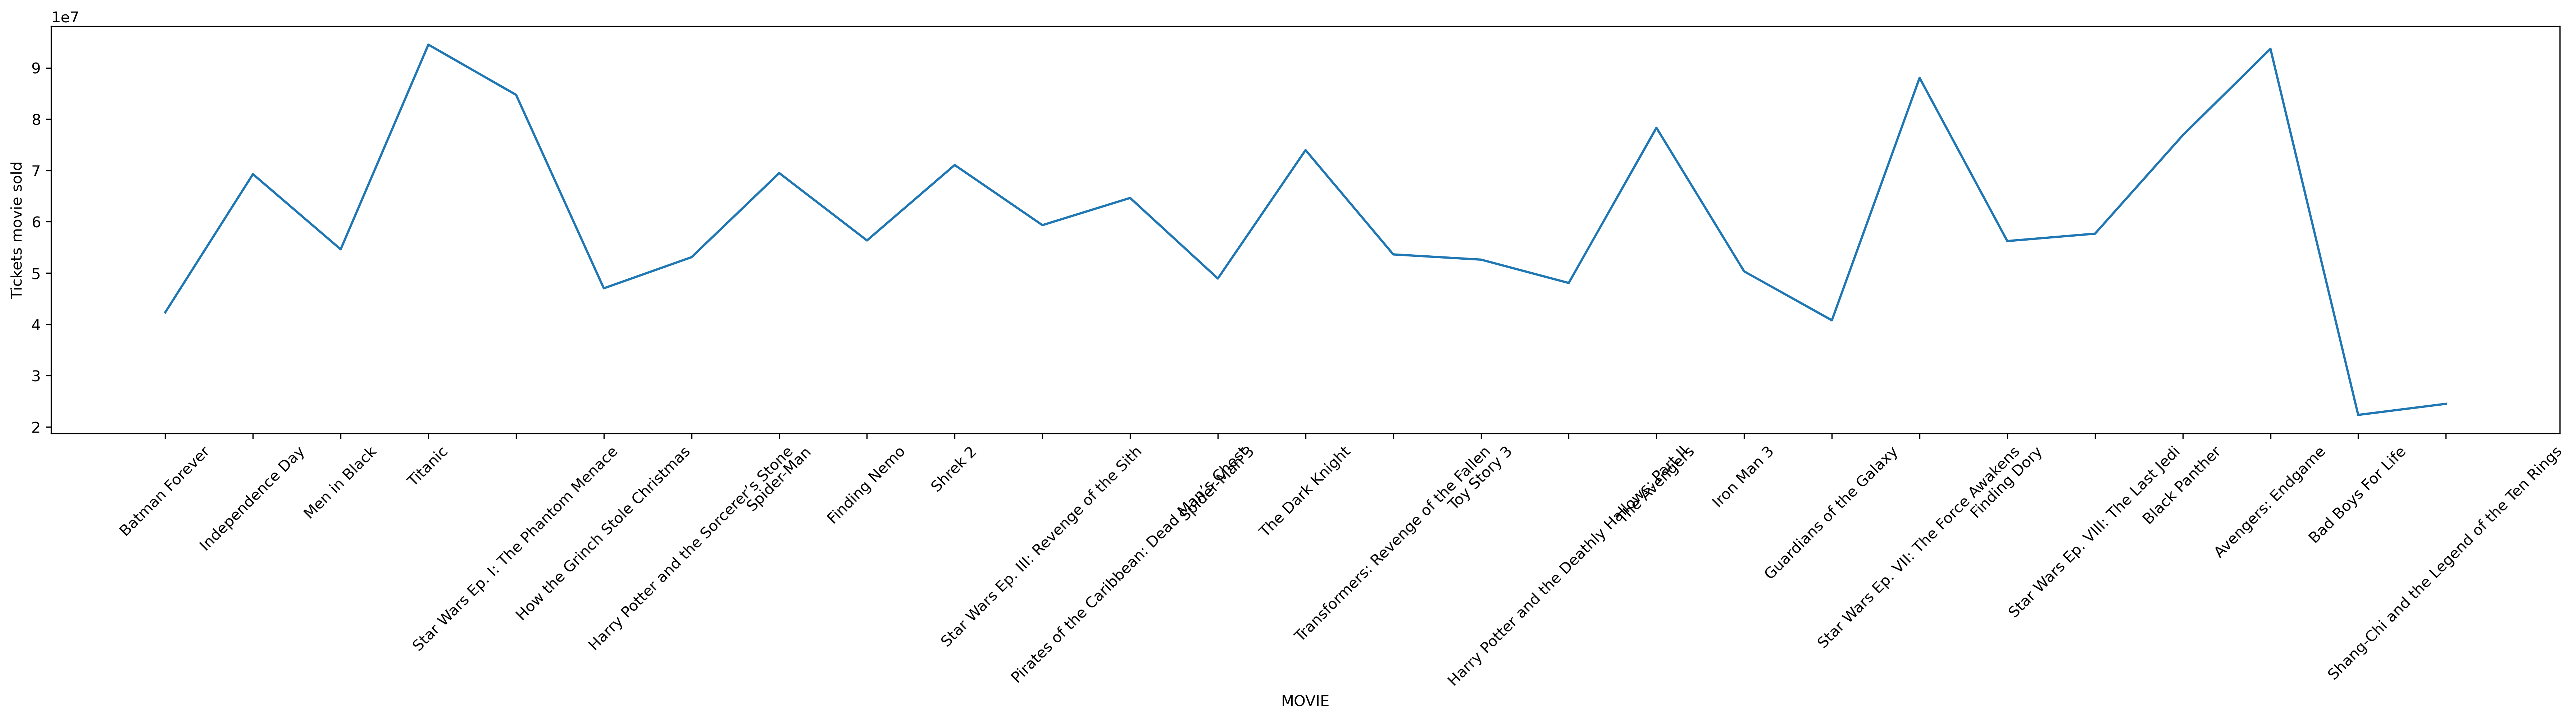

In [29]:
# Tickets sold by movie by oldest movie to newest. Lineplot
plt.figure(figsize=(30,5),dpi=300)
sns.lineplot(data=HighestGrossingplussales, x='MOVIE', y='Tickets movie sold')
plt.xticks(rotation=45)
plt.show()

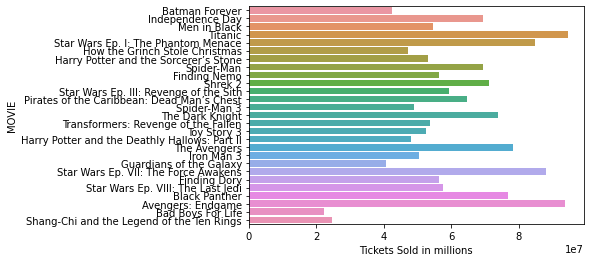

In [27]:
# Tickets sold by movie by oldest movie to newest. Barplot
sns.barplot(data=HighestGrossingplussales, y='MOVIE', x='Tickets movie sold')
plt.xlabel('Tickets Sold in millions')
plt.show()

In [ ]:
HighestGrossingplussales[['YEAR','MOVIE','TOTAL FOR YEAR','TICKETS SOLD_x','AVERAGE TICKET PRICE']]

In [ ]:
HighestGrossingplussales[['YEAR','MOVIE','DISTRIBUTOR','TOTAL FOR YEAR','TICKETS SOLD_x']].sort_values('DISTRIBUTOR')

In [ ]:
pieplot = HighestGrossingplussales[['DISTRIBUTOR', 'TOTAL FOR YEAR']]
sns.catplot(data=HighestGrossingplussales, x='GENRE', y='TOTAL FOR YEAR')